In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from  xgboost import XGBRegressor
from sklearn import metrics

In [192]:
df = pd.read_csv('calories.csv')
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [193]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [194]:
df.shape


(15000, 9)

In [195]:
df.isnull().sum().sum()

np.int64(0)

In [196]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [198]:
df.duplicated().sum()

np.int64(0)

In [199]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [200]:
df = df.drop(columns = ['User_ID'],axis = 1)

In [201]:
df.shape

(15000, 8)

In [202]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [203]:
df.Gender.value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [204]:
df.replace({'Gender':{'male':0,'female':1}},inplace = True)

/tmp/ipykernel_25909/3778250159.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0,'female':1}},inplace = True)


In [205]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [206]:
corr = df.corr()

In [207]:
corr

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

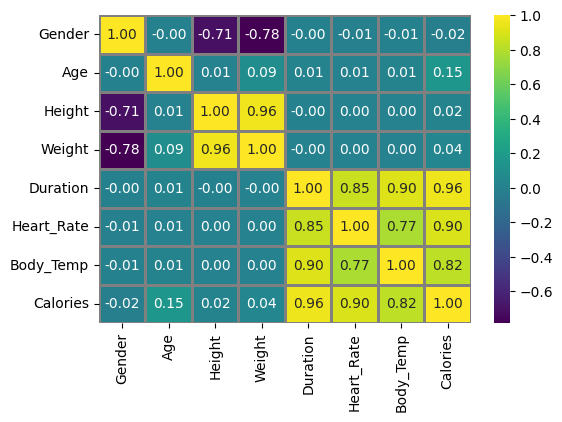

In [208]:
plt.figure(figsize = (6,4))
sns.heatmap(corr ,annot = True,fmt = '0.2f',linecolor = 'grey',linewidth = 0.9,cmap = 'viridis')

In [209]:
df['Heart_Rate'].skew()

np.float64(-0.01070407972854895)

In [210]:
df[['Heart_Rate','Calories']].corr()

,Heart_Rate,Calories
Heart_Rate,1.000000,0.897882
Calories,0.897882,1.000000


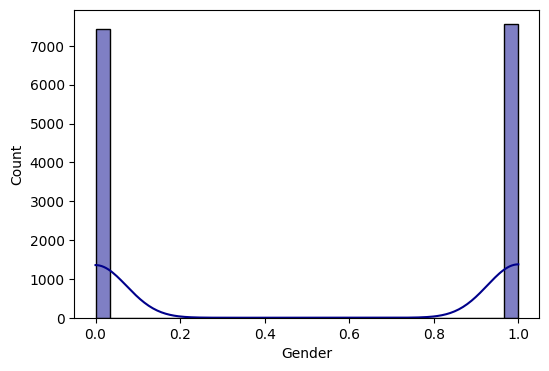

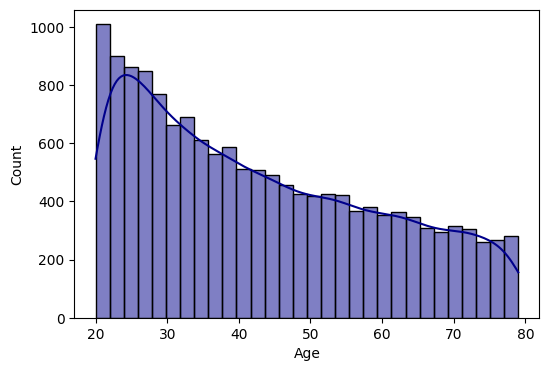

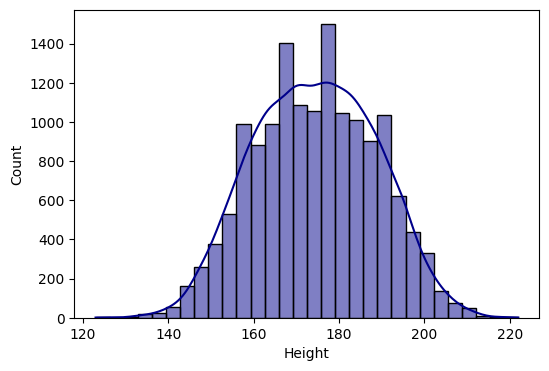

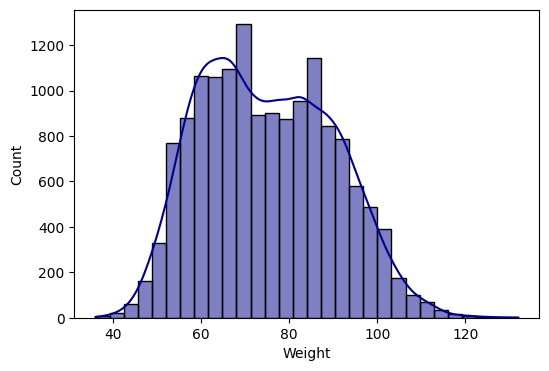

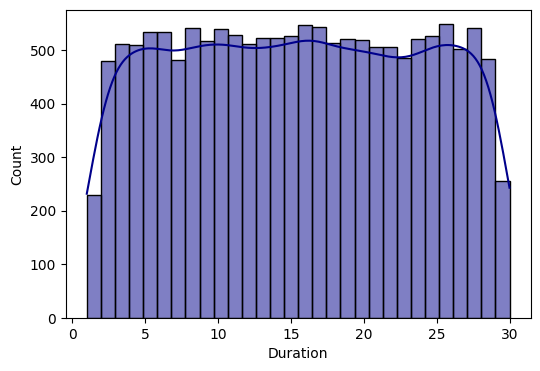

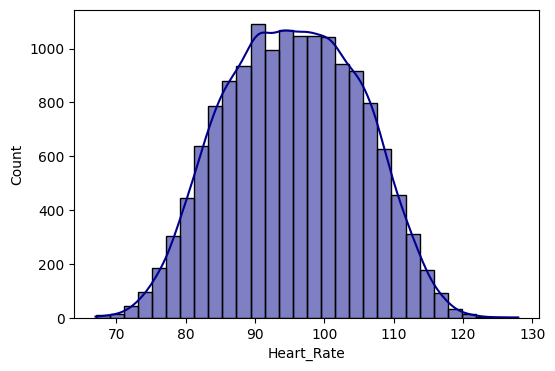

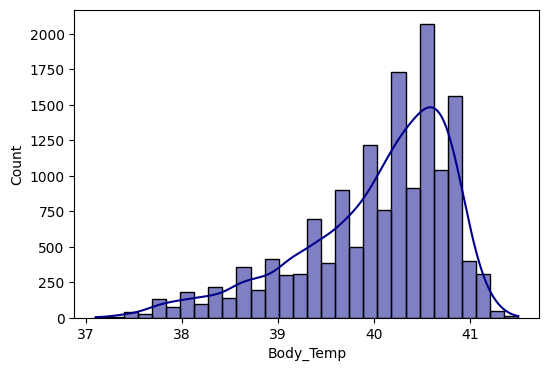

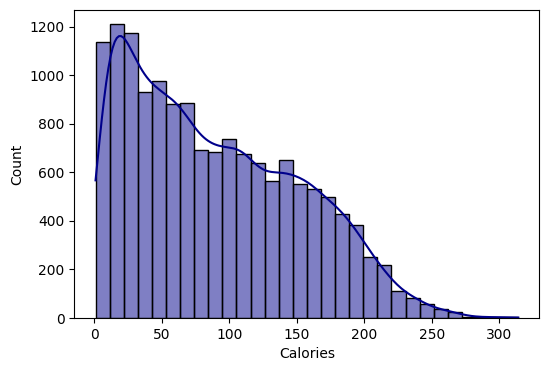

In [211]:
for i in df.columns:
    plt.figure(figsize = (6,4))
    sns.histplot(df[i],kde = True,bins = 30,color='darkblue')
     


# splitting_data

In [212]:
df.tail()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,0,63,173.0,79.0,18.0,92.0,40.5,98.0


# testing_data_segreggation

In [213]:
data = df.sample(n = 550)

test_data= data.reset_index()
test_data.drop(columns = 'index',axis = 1,inplace = True)
print(test_data.sample())

df = df.drop(data.index)
df.shape


     Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
454       1   61   179.0    76.0      21.0        99.0       40.3     121.0


(14450, 8)

In [214]:
X = df.drop(columns = ['Calories'],axis = 1)
y = df['Calories']

In [215]:
print(X.shape,y.shape)

(14450, 7) (14450,)


In [216]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [217]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11560, 7) (2890, 7) (11560,) (2890,)


In [218]:
print(X_test,y_train)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
8136        1   20   165.0    64.0      21.0       107.0       40.7
12936       1   64   170.0    69.0      10.0        92.0       39.7
2924        1   21   170.0    67.0      13.0        90.0       39.8
10889       1   33   154.0    58.0       1.0        87.0       37.8
6951        1   31   204.0   101.0       6.0        84.0       39.3
...       ...  ...     ...     ...       ...         ...        ...
8017        1   32   173.0    67.0      14.0        96.0       39.9
14284       0   71   181.0    91.0       6.0        94.0       39.1
6978        1   42   157.0    56.0       3.0        88.0       38.7
11787       1   68   181.0    81.0      25.0       113.0       40.5
1255        1   64   174.0    69.0       4.0        88.0       38.7

[2890 rows x 7 columns] 4834      17.0
8042      59.0
2326       9.0
6066      12.0
10757    183.0
         ...  
5394      10.0
13931     37.0
5600     108.0
897       12.0
7551     

In [219]:
import xgboost as xgb

In [220]:
model = xgb.XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)


In [221]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [222]:
model.fit(X_train,y_train) 

/home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:51:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:51:00] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:51:00] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


XGBoostError: [22:51:00] /workspace/src/tree/updater_gpu_hist.cu:847: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device
Stack trace:
  [bt] (0) /home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/lib/libxgboost.so(+0x2a6ecc) [0x7a63bcca6ecc]
  [bt] (1) /home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/lib/libxgboost.so(+0xfd7c14) [0x7a63bd9d7c14]
  [bt] (2) /home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/lib/libxgboost.so(+0xfdf966) [0x7a63bd9df966]
  [bt] (3) /home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/lib/libxgboost.so(+0x63b602) [0x7a63bd03b602]
  [bt] (4) /home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/lib/libxgboost.so(+0x63ca5d) [0x7a63bd03ca5d]
  [bt] (5) /home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/lib/libxgboost.so(+0x68d38e) [0x7a63bd08d38e]
  [bt] (6) /home/aryan-45/.local/share/pipx/venvs/jupyterlab/lib/python3.13/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x77) [0x7a63bcbb6fa7]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x86de) [0x7a64329e56de]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x46cf) [0x7a64329e16cf]



In [ ]:
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

In [223]:
train_acc = metrics.mean_absolute_error(y_train,X_train_pred)
test_acc = metrics.mean_absolute_error(y_test,X_test_pred)

In [224]:
print('accuracy of training data = ',train_acc)

accuracy of training data =  66.72884707888218


In [225]:
print('accuracy of testing data = ',test_acc)

accuracy of testing data =  67.68469988104587


In [226]:
residual = y_test - X_test_pred

Text(0, 0.5, 'X_test_pred')

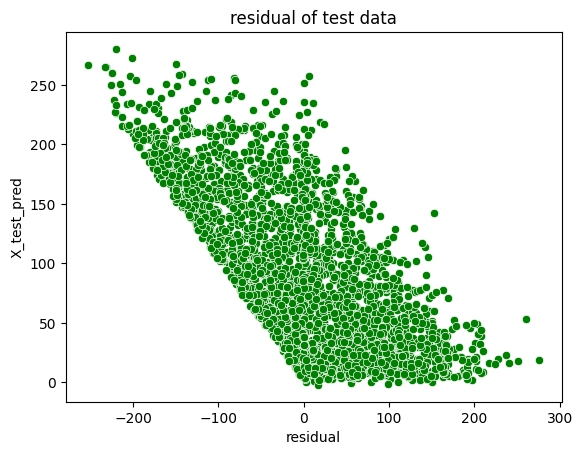

In [227]:
sns.scatterplot(y = X_test_pred,x = residual,color  = 'green')
plt.title('residual of test data')
plt.xlabel('residual')
plt.ylabel('X_test_pred')

<Axes: xlabel='Calories', ylabel='Count'>

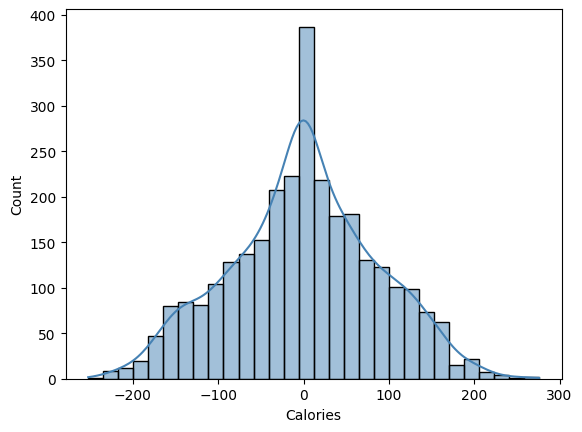

In [228]:
sns.histplot(residual,color = 'steelblue',kde = True,bins = 30)

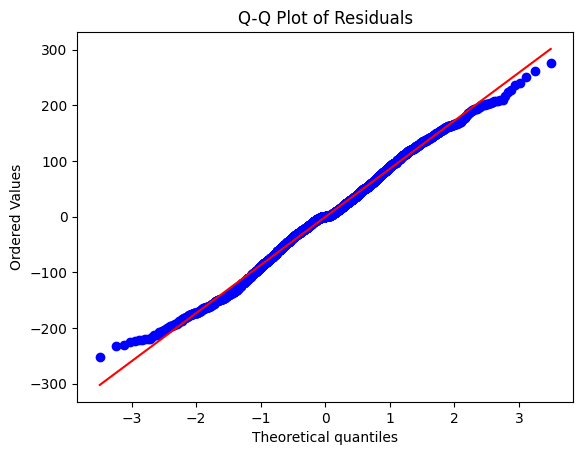

In [229]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [179]:
residual2 = y_train-X_train_pred
residual2

4839     0.851318
8046     1.012335
2338    -1.669952
6068     1.946198
10757    1.750381
           ...   
5398     0.482040
13929    0.625092
5604    -0.635681
899      0.313202
7553     0.004723
Name: Calories, Length: 11560, dtype: float64

<Axes: xlabel='Calories'>

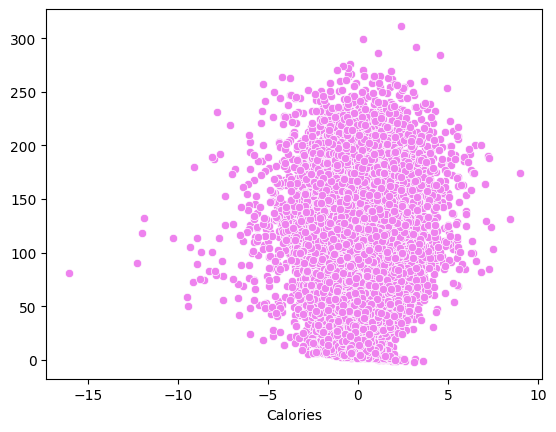

In [180]:
sns.scatterplot(y = X_train_pred,x = residual2,color  = 'violet')

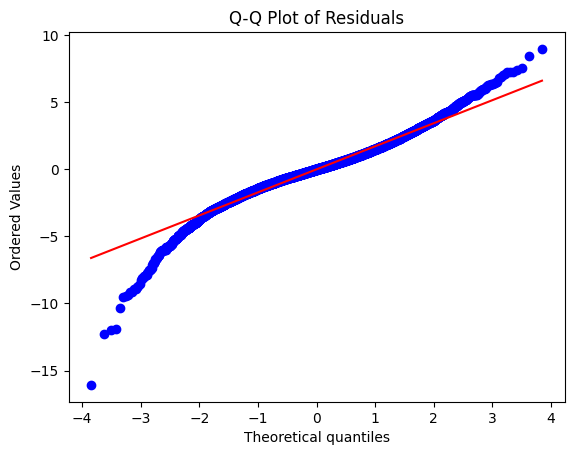

In [181]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residual2, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


<Axes: xlabel='Calories', ylabel='Count'>

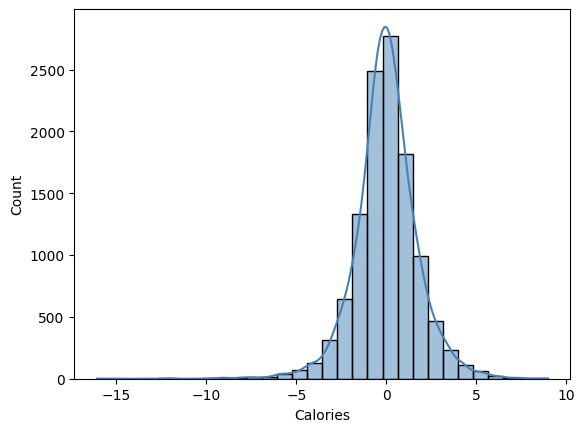

In [182]:
sns.histplot(residual2,color = 'steelblue',kde = True,bins = 30)

In [183]:
import pickle

In [184]:
pickle.dump(model,open('my_model.pkl','wb'))

In [185]:
pikled_model = pickle.load(open('my_model.pkl','rb'))

In [186]:
pikled_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

# my_output

In [189]:
a = int(input("Enter the input : "))
Input = test_data.iloc[a]

# remove result columns
Input = Input.iloc[0:-1]

# 1. Extract the row correctly (for example, row index `a`)
to_array = Input.to_numpy()
to_array


# 2. Reshape to 2D for model input (1 sample, 7 features)
final_input = to_array.reshape(1,-1)
# final_input = to_array.reshape(1, -1)

final_input

# 3. Predict
result = pikled_model.predict(final_input)

print(f"\n\nmy output is {result} \n\n expected output = {test_data['Calories'][a]}")

Enter the input :  3




my output is [42.886955] 

 expected output = 42.0


In [190]:
test_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,69,163.0,68.0,16.0,95.0,40.3,89.0
1,1,41,161.0,62.0,8.0,90.0,39.5,37.0
2,0,66,183.0,86.0,15.0,94.0,40.3,91.0
3,1,52,179.0,76.0,9.0,90.0,39.8,42.0
4,1,50,159.0,57.0,28.0,107.0,41.4,187.0
